In [11]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris , load_diabetes 
from sklearn.preprocessing import StandardScaler 

In [32]:
data = load_iris()
X = pd.DataFrame(data = data['data'],columns = data['feature_names'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
y = data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Naive Bayes Classifier

In [89]:
class NBC:
    def __init__(self):
        return None 
    
    def calc_stats(self,X,y):
        self.mean = X.groupby(y).apply(np.mean).to_numpy()
        self.var = X.groupby(y).apply(np.var).to_numpy()
    
    def gaussian_density(self,cls_idx ,x):
        mean = self.mean[cls_idx]
        var = self.var[cls_idx]
         #print(x , mean.shape)
        numerator = np.exp((-1/2)*((x-mean)**2) / (2*var))
        denominator = np.sqrt(2*np.pi*var)
        return numerator/denominator
    
    def calc_prior(self ,x , y ):
        self.priors = (x.groupby(y).apply(lambda x :len(x))/self.rows).to_numpy()
    
    def calc_posterior(self,x):
        posteriors = [] 
        for i in range(self.count):
            prior = np.log(self.priors[i])
            conditional = np.sum(np.log(self.gaussian_density(i,x)))
            posterior = prior + conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]
    
    def fit(self , X ,y):
        self.classes = np.unique(y)
        self.count = len(self.classes)
        self.rows = X.shape[0]
        
        self.calc_stats(X,y)
        self.calc_prior(X,y)
        
    def predict(self, X):
        return [self.calc_posterior(f) for f in X.to_numpy()]

In [90]:
model = NBC()

In [91]:
model.fit(X,y)
y_p = model.predict(X)

In [92]:
from sklearn.metrics import accuracy_score as a_s
a_s(y ,y_p)

0.96

# PCA vs LDA 

In [95]:
class PCA:
    def __init__(self,n_components):
        self.n = n_components
    
    def scale(self,x):
        return StandardScaler().fit_transform(x.to_numpy())
    
    def fit_transform(self,x):
        x_scaled = self.scale(x)
        features = self.scale(x).T
        cov_matrix = np.cov(features)
        values , vectors = np.linalg.eig(cov_matrix)
        decomp_x = [] 
        for i in range(self.n):
            decomp_x.append(x_scaled.dot(vectors.T[i]))
        return np.array(decomp_x)

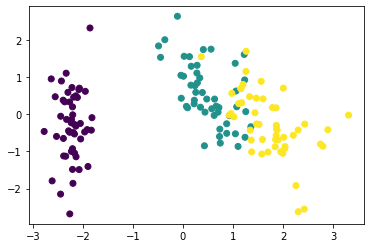

In [102]:
xp = PCA(n_components=2).fit_transform(X)
import matplotlib.pyplot as plt 
plt.scatter(xp.T[:,0],xp.T[:,1] , c=y)

In [114]:
class LDA:
    def __init__(self, n_components):
        self.n = n_components 
        
    def fit_transform(self, X ,y ):
        X  = np.array(X)
        h , w = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)
        
        scatter_t = np.cov(X.T)*(h-1)
        scatter_w = 0 
        for i in range(num_classes):
            class_items = np.flatnonzero(y==unique_classes[i])
            #scatter_w = scatter_w + np.cov(X[class_items].T)*(len(class_items)-1)
            scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items)-1)
        scatter_b = scatter_t - scatter_w 
        values , vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
        pc = [] 
        for i in range(self.n):
            pc.append(X.dot(vectors.T[i]))
        return np.array(pc)        

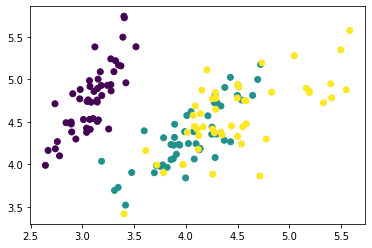

In [115]:
xp = LDA(n_components=2).fit_transform(X,y)
import matplotlib.pyplot as plt 
plt.scatter(xp.T[:,0],xp.T[:,1] , c=y)

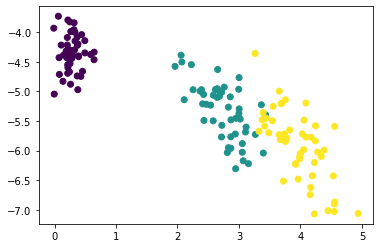

In [120]:
class LDA :
    def __init__(self , n):
        self.n = n 
        
    def fit_transform(self,X,y):
        X = np.array(X)
        h , w = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)
        
        scatter_t = np.cov(X.T)*(h-1)
        scatter_w = 0 
        for i in range(num_classes):
            class_items = np.flatnonzero(y==unique_classes[i])
            scatter_w += np.cov(X[class_items].T)*(len(class_items)-1)
        scatter_b = scatter_t - scatter_w 
        values , vectors  = np.linalg.eigh(np.linalg.pinv(np.dot(scatter_w , scatter_b)))
        pc  = [] 
        for i in range(self.n):
            pc.append(X.dot(vectors.T[i]))
        return np.array(pc)

xp = LDA(n=2).fit_transform(X,y)
import matplotlib.pyplot as plt 
plt.scatter(xp.T[:,0],xp.T[:,1] , c=y)

# Som

In [126]:
from sklearn.datasets import make_blobs
from minisom import MiniSom

In [159]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0 ,cluster_std =0.5)
som_shape = (1,3)
model = MiniSom(som_shape[0] , 
                som_shape[1] , 
                X.shape[1],
                sigma = 0.5 , 
                learning_rate = 0.5
)
model.train_batch(X , 500 ,verbose =True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.6288900969443654


In [160]:
winner_coordinates = np.array([model.winner(x) for x in X]).T


In [161]:
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)


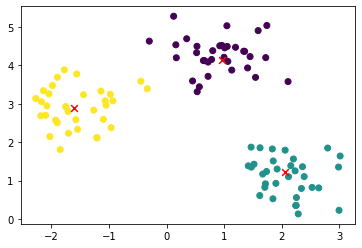

In [164]:
plt.scatter(X[:,0],X[:,1],c=cluster_index)
centroids = model.get_weights()[0]
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=45,color='r')

In [154]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

In [150]:
model.get_weights()[0]

array([[ 2.2941258 ,  1.48744335],
       [ 0.74456683,  3.75586647],
       [-2.01830756,  2.86471634]])

In [152]:
centroids[:,0],centroids[:,1]

(array([ 2.2941258 ,  0.74456683, -2.01830756]),
 array([1.48744335, 3.75586647, 2.86471634]))

# Hidden Markov Model

In [165]:
!pip install hmmlearn

     -------------------------------------- 123.8/123.8 kB 1.0 MB/s eta 0:00:00


In [169]:
from hmmlearn import hmm
data = load_iris()
X = pd.DataFrame(data = data['data'],columns = data['feature_names'])
X.head()
model = hmm.GaussianHMM(n_components=3,covariance_type='diag')
model.fit(X)
y_pred = model.predict(X)
len(y_pred)

150

# BPNN

In [256]:
class BPNN:
    def __init__(self,input_size , hidden_size , output_size):
        self.input_size = input_size
        self.output_size = output_size 
        self.hidden_size = hidden_size
        
        self.weight_ih = np.random.randn(self.input_size , self.hidden_size)
        self.bias_h = np.random.randn(self.hidden_size)
        self.weight_ho = np.random.randn(self.hidden_size , self.output_size)
        self.bias_o = np.random.randn(self.output_size)
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def sig_der(self,x):
        return x * (1-x)
    
    def forward(self,x):
        x = np.dot(x , self.weight_ih) + self.bias_h
        x = self.sigmoid(x)
        x = np.dot(x , self.weight_ho) + self.bias_o
        return self.sigmoid(x)
    
    def backward(self,x,y,y_pred):
        o_error = y.reshape(-1,1) - y_pred 
        o_delta = o_error * self.sig_der(y_pred)
        
        h_error = np.dot(o_delta , self.weight_ho.T)
        h_delta = h_error + self.sig_der(h_error)
        
        self.weight_ho += np.dot(h_delta.T , o_delta )
        self.bias_o += np.sum(o_delta ,axis=0)
        
        self.weight_ih += np.dot(x.T , h_delta )
        self.bias_h += np.sum(h_delta , axis=0)
        
    def train(self,X,y,epochs):
        for i in range(epochs):
            y_pred = self.forward(X)
            #  print(y_pred[:,0].shape , y.shape)
            self.backward(X , y ,y_pred)
            mse = np.mean((y-y_pred)**2)
            print(f'Epoch {i} Error : {mse}')
    def predict(self , x):
        return self.forward(x)

In [257]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0 ,cluster_std =0.5)

In [258]:
model = BPNN(2,5,1)
model.train(X,y,10)

Epoch 0 Error : 0.25304821780491915
Epoch 1 Error : 0.47379857680265197
Epoch 2 Error : 0.48195697803516313
Epoch 3 Error : 0.4402406710516707
Epoch 4 Error : 0.49651059426326266
Epoch 5 Error : 0.45458544200397216
Epoch 6 Error : 0.48027611396983894
Epoch 7 Error : 0.484652021764293
Epoch 8 Error : 0.48259777199088155
Epoch 9 Error : 0.4796637613355022


C:\Users\HRITHI~1\AppData\Local\Temp/ipykernel_24204/517466735.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [259]:
y_pred = model.predict(X)
a_s(y,np.round(y_pred))

C:\Users\HRITHI~1\AppData\Local\Temp/ipykernel_24204/517466735.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.99